# Lista 5

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image
from scipy import signal


import matplotlib.style as style 

plt.rcParams['font.size'] = 20
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['figure.titlesize'] = 12
plt.rcParams['figure.figsize'] = 10, 8
plt.rcParams['text.usetex'] = True

# O LMS

$\mathbf{w}(k+1) = \mathbf{w}(k) + 2\mu e(k)\mathbf{x}(k)$

LMS algorithm
    - Inicialization
$\mathbf{x}(0) = \mathbf{w}(0) = [0 0 ... 0]^{T}$
    - Do for k >= 0
1. $e(k) = d(k) - \mathbf{x}^{T}(k)\mathbf{w}(k)$

2. $\mathbf{w}(k+1) = \mathbf{w}(k) + 2\mu e(k)\mathbf{x}(k)$

### Nesse caso estou considerando que eu acertei exatamente o número de coeficientes do filtro


In [69]:
# Sistema que eu quero descobrir
h = np.array([[-2], [0.25], [0.25]])

# Número de iterações
n_iteracoes = 3000
# Número de Monte Carlo
n_mc = 100
passos = [0.01, 0.025, 0.05, 0.1]
mse = []
for passo in passos:
    for mc in range(n_mc):

        # Inicializações
        erros = np.array([])
        w_atual = np.array([[0], [0], [0]])
        x = np.array([[0], [0], [0]])
        # Ruído com média zero
        ruido = np.random.random(n_iteracoes)
        ruido = ruido - ruido.mean()

        for ii in range(n_iteracoes):
            desejado = np.dot(x.T, h) + 0.1*ruido[ii]
            saida = np.dot(x.T, w_atual) 
            erros = np.append(erros, [desejado - saida])

            # O LMS
            w_prox = w_atual + 2*passo*erros[ii]*x

            # Atualiza o valor dos coeficientes do filtro
            w_atual = w_prox

            #Atualiza o x (shifta o que tem e coloca um valor novo no final)
            x = np.roll(x, shift=-1)
            x = np.append(arr=x[:-1], values=ruido[ii])
            x = np.reshape(x, (len(x), 1))  
        if mc == 0:
            erros_mc = erros
        else:
            erros_mc = np.vstack((erros_mc, erros))
            
    mse += [np.mean(erros_mc*erros_mc, axis=0)] 

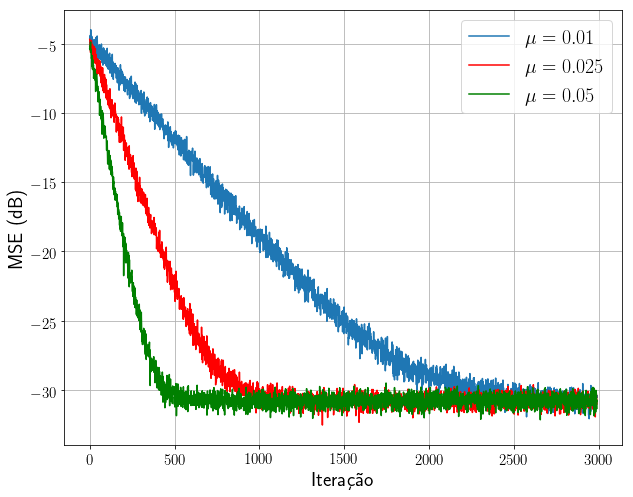

In [91]:
eps = 10**-16
x_plt = []
for cada in mse: 
    cada = cada[10:]
    x_plt += [10 * np.log10(cada + eps)]

plt.rcParams['font.size'] = 20
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['figure.titlesize'] = 12
plt.rcParams['figure.figsize'] = 10, 8
plt.rcParams['text.usetex'] = True


fig, ax1 = plt.subplots()

ax1.plot(range(len(mse[0][10:])), x_plt[0], label=r'$\mu = 0.01$')
ax1.plot(range(len(mse[1][10:])), x_plt[1], 'r', label=r'$\mu = 0.025$')
ax1.plot(range(len(mse[2][10:])), x_plt[2], 'g', label=r'$\mu = 0.05$')
ax1.legend(loc='upper right')
ax1.set_ylabel(r'MSE~(dB)')
ax1.set_xlabel(r'Iteração')
ax1.grid(True)


plt.savefig('mse_lms.eps', transparent=True, optimize=True, bbox_inches='tight')
plt.show()

### Submodelado

In [28]:
# Sistema que eu quero descobrir
h = np.array([[-2], [0.25], [0.25], [0]])


# Número de iterações
n_iteracoes = 2500
# Número de Monte Carlo
n_mc = 100

passo = 0.05
for mc in range(n_mc):
    
    # Inicializações
    erros = np.array([])
    # 3 coef no FA
    w_atual = np.array([[0], [0], [0]])
    x_fa = np.array([[0], [0], [0]])
    
    # 4 coef no H
    x_h = np.array([[0], [0], [0], [0]])
    
    # Ruído com média zero
    ruido = np.random.random(n_iteracoes)
    ruido = ruido - ruido.mean()
    
    for ii in range(n_iteracoes):
        desejado = np.dot(x_h.T, h) #+ 0.1*ruido[ii]
        saida = np.dot(x_fa.T, w_atual) 
        erros = np.append(erros, [desejado - saida])

        # O LMS
        w_prox = w_atual + 2*passo*erros[ii]*x_fa

        # Atualiza o valor dos coeficientes do filtro
        w_atual = w_prox

        #Atualiza o x (shifta o que tem e coloca um valor novo no final)
        x_fa = np.roll(x_fa, shift=1)
        x_fa = np.append(arr=ruido[ii], values=x_fa[1:] )
        x_fa = np.reshape(x_fa, (len(x_fa), 1))  

        x_h = np.roll(x_h, shift=1)
        x_h = np.append(arr=ruido[ii], values=x_h[1:])
        x_h = np.reshape(x_h, (len(x_h), 1))  
    if mc == 0:
        erros_mc = erros
    else:
        erros_mc = np.vstack((erros_mc, erros))
    
        

## Supramodelo

In [109]:
# Sistema que eu quero descobrir
h = np.array([[1], [1.25], [1.30], [-1]])


# Número de iterações
n_iteracoes = 3000
# Número de Monte Carlo
n_mc = 1

coeficientes = []
passo = 0.05
for mc in range(n_mc):
    
    # Inicializações
    erros = np.array([])
    # 6 coef no FA
    w_atual = np.array([[0], [0], [0], [0], [0], [0]])
    x_fa = np.array([[0], [0], [0], [0], [0], [0]])
    
    # 4 coef no H
    x_h = np.array([[0], [0], [0], [0]])
    
    # Ruído com média zero
    ruido = np.random.random(n_iteracoes)
    ruido = ruido - ruido.mean()
    
    for ii in range(n_iteracoes):
        desejado = np.dot(x_h.T, h) #+ 0.1*ruido[ii]
        saida = np.dot(x_fa.T, w_atual) 
        erros = np.append(erros, [desejado - saida])

        # O LMS
        w_prox = w_atual + 2*passo*erros[ii]*x_fa

        # Atualiza o valor dos coeficientes do filtro
        w_atual = w_prox
        coeficientes += [w_prox]
        
        #Atualiza o x (shifta o que tem e coloca um valor novo no final)
        x_fa = np.roll(x_fa, shift=1)
        x_fa = np.append(arr=ruido[ii], values=x_fa[1:] )
        x_fa = np.reshape(x_fa, (len(x_fa), 1))  

        x_h = np.roll(x_h, shift=1)
        x_h = np.append(arr=ruido[ii], values=x_h[1:])
        x_h = np.reshape(x_h, (len(x_h), 1))  
    if mc == 0:
        erros_mc = erros
    else:
        erros_mc = np.vstack((erros_mc, erros))

In [113]:
coeficientes[0]

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [114]:
primeiro_coef = []
segundo_coef = []
terceiro_coef = []
quarto_coef = []
quinto_coef = []
sexto_coef = []
for coef in coeficientes:
    primeiro_coef += [coef[0]]
    segundo_coef += [coef[1]]
    terceiro_coef += [coef[2]]
    quarto_coef += [coef[3]]
    quinto_coef += [coef[4]]
    sexto_coef += [coef[5]]

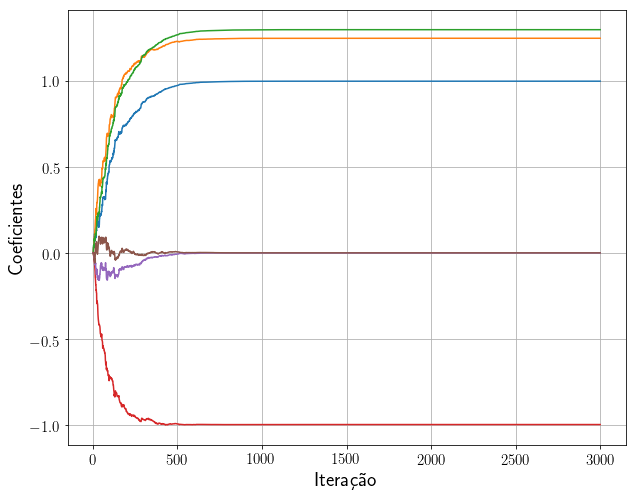

In [119]:

plt.rcParams['font.size'] = 20
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['figure.titlesize'] = 12
plt.rcParams['figure.figsize'] = 10, 8
plt.rcParams['text.usetex'] = True


fig, ax1 = plt.subplots()

ax1.plot(range(len(primeiro_coef)), primeiro_coef)
ax1.plot(range(len(primeiro_coef)), segundo_coef)
ax1.plot(range(len(primeiro_coef)), terceiro_coef)
ax1.plot(range(len(primeiro_coef)), quarto_coef)
ax1.plot(range(len(primeiro_coef)), quinto_coef)
ax1.plot(range(len(primeiro_coef)), sexto_coef)


ax1.set_ylabel(r'Coeficientes')
ax1.set_xlabel(r'Iteração')
ax1.grid(True)


plt.savefig('coeficientes.eps', transparent=True, optimize=True, bbox_inches='tight')
plt.show()

In [93]:
w_prox

array([[-2.00000000e+00],
       [ 2.50000000e-01],
       [ 2.50000000e-01],
       [ 5.73597077e-17],
       [ 6.52365898e-17],
       [ 7.36669246e-18]])